<a href="https://colab.research.google.com/github/scottsun2020/evolutionary_worker_farm_assignment/blob/main/Swarm_farm_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Import the historical and forecast data

In [ ]:
print("import the csv file")

from google.colab import files
uploaded = files.upload()

import the csv file


Saving work_forecast.csv to work_forecast.csv
Saving workerhist.csv to workerhist.csv


###Read and Clean the Historical data

In [ ]:
import pandas as pd
df_hist = pd.read_csv("workerhist.csv")
df_fore = pd.read_csv("work_forecast.csv")
print("Historical Data:")
df_hist.head()


Historical Data:


,Unnamed: 0,Date,Worker_id,Performance,Work_type,North_Farm_Distance,South_Farm_Distance,East_Farm_Distance,West_Farm_Distance,Central_Farm_Distance
0,0,2023-12-01 00:00:00.000,75938377,420,Pruning,4508.0,34.0,33.0,6.0,28.0
1,1,2023-12-01 00:00:00.000,48337975,270,Pruning,4506.0,37.0,35.0,9.0,30.0
2,2,2023-12-01 00:00:00.000,75554289,270,Pruning,4504.0,36.0,35.0,9.0,29.0
3,3,2023-12-01 00:00:00.000,32223030,1125,Pruning,4502.0,8.0,6.0,21.0,1.0
4,4,2023-12-01 00:00:00.000,46640655,1560,Pruning,4490.0,30.0,29.0,18.0,21.0


In [ ]:
df_hist = df_hist.drop(df_hist.columns[0], axis=1) # Drop the first column

In [ ]:
df_hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1698449 entries, 0 to 1698448
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Worker_id              int64  
 2   Performance            int64  
 3   Work_type              object 
 4   North_Farm_Distance    float64
 5   South_Farm_Distance    float64
 6   East_Farm_Distance     float64
 7   West_Farm_Distance     float64
 8   Central_Farm_Distance  float64
dtypes: float64(5), int64(2), object(2)
memory usage: 116.6+ MB


###Overview of Perforamnce of Each Work Type per Month

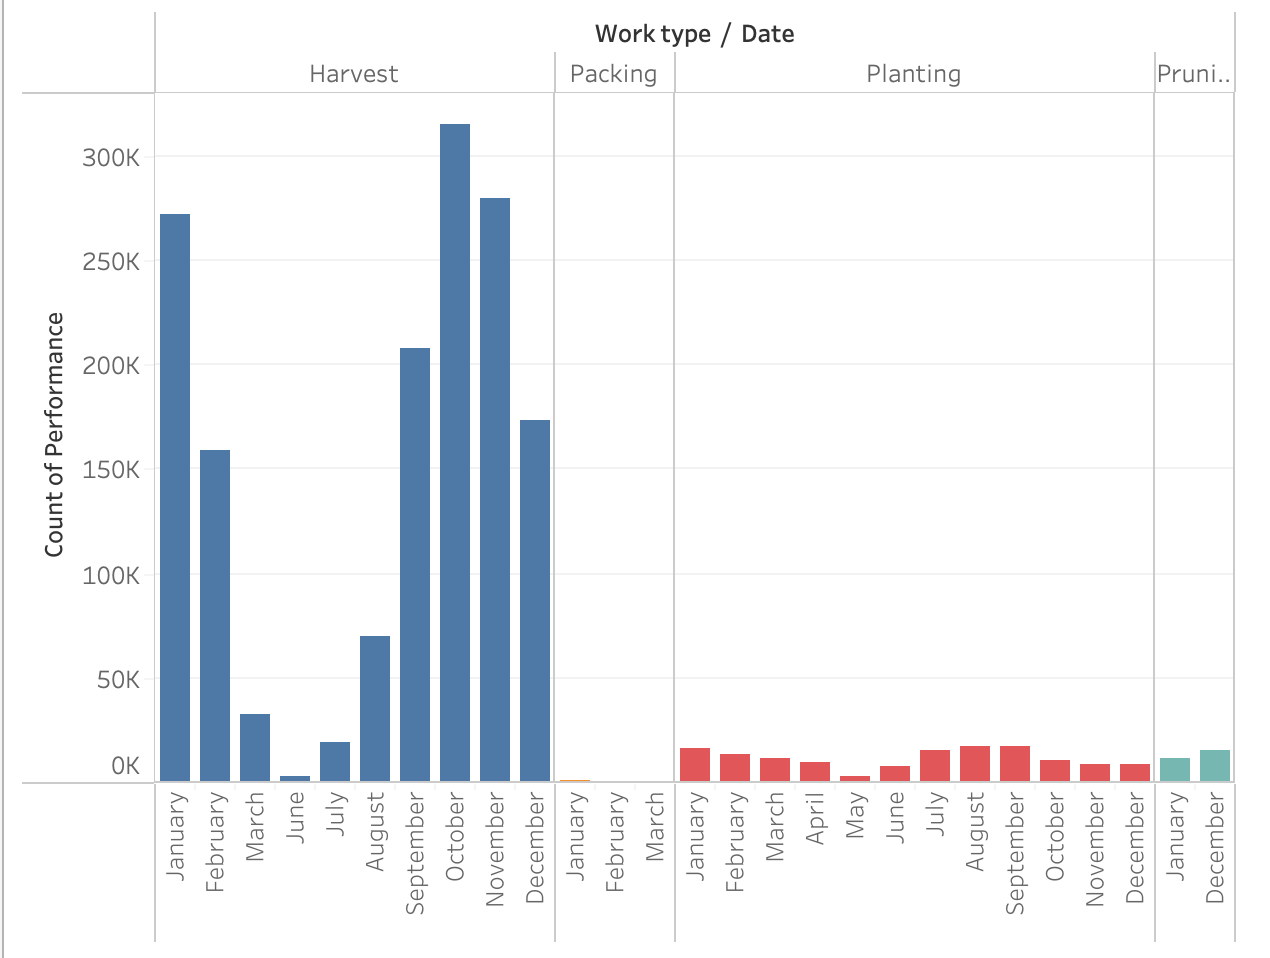

###Read Forecast data

In [ ]:
print("forecast data frame :")
print(df_fore.head(20))

forecast data frame :
          Date Work_type     Farm  Work Requirement
0   2025-01-24   Harvest  Central        1388.41000
1   2025-01-24   Harvest     East       17657.46000
2   2025-01-24   Harvest    North        4709.35000
3   2025-01-24   Harvest    South       25071.00000
4   2025-01-24  Planting  Central          41.79997
5   2025-01-24  Planting     East           7.14334
6   2025-01-24  Planting    South          84.56332
7   2025-01-24   Pruning     West        2941.18091
8   2025-01-25   Harvest  Central        1192.66000
9   2025-01-25   Harvest     East       12647.74000
10  2025-01-25   Harvest    North        5597.51000
11  2025-01-25   Harvest    South       19253.01000
12  2025-01-25  Planting  Central          41.79997
13  2025-01-25  Planting     East           7.14334
14  2025-01-25  Planting    South          84.56332
15  2025-01-25   Pruning     West       19502.75600
16  2025-01-26  Planting     East           3.00000
17  2025-01-26  Planting    South         

###Exploring Worker and Work Type Relationship
Check if any worker work different type work

Some workers only work one type while others work multiple types

In [ ]:
# Count the number of unique work types per worker
worker_work_counts = df_hist.groupby("Worker_id")["Work_type"].nunique().reset_index()

# Rename columns
worker_work_counts.columns = ["Worker_id", "Unique_Work_Types"]

# Display workers with multiple work types
workers_with_multiple_jobs = worker_work_counts[worker_work_counts["Unique_Work_Types"] > 1]
print(workers_with_multiple_jobs)


       Worker_id  Unique_Work_Types
20        374460                  2
42        836494                  2
65        952065                  2
81       1049278                  2
82       1050938                  2
...          ...                ...
37304   81141890                  2
37328   81322154                  2
37333   81420711                  2
37346   81739486                  2
37370   90565626                  3

[2611 rows x 2 columns]


In [ ]:
# Find workers who appear with different work types
duplicate_workers = df_hist.groupby("Worker_id")["Work_type"].apply(set).reset_index()

# Show only workers who worked in more than one work type
#duplicate_workers = duplicate_workers[duplicate_workers["Work_type"].apply(len) > 2]

duplicate_workers


,Worker_id,Work_type
0,114046,{Harvest}
1,124986,{Harvest}
2,188278,{Harvest}
3,208950,{Harvest}
4,225114,{Harvest}
...,...,...
37380,91209149,{Harvest}
37381,91450071,{Harvest}
37382,91770897,{Harvest}
37383,92355945,{Harvest}


###Create Average Performance Table of Certain Task Per Worker

In [ ]:
# Group by Worker_id and Work_type, then calculate the average performance
avg_performance_by_work_type = df_hist.groupby(["Worker_id", "Work_type"])["Performance"].mean().reset_index()

# Pivot the table to make each Work_type a separate column
avg_performance_pivot = avg_performance_by_work_type.pivot(index="Worker_id", columns="Work_type", values="Performance")

# Rename columns for clarity
avg_performance_pivot = avg_performance_pivot.rename_axis(None, axis=1).reset_index()

# Fill missing values with 0 (if a worker didn't perform a certain task)
avg_performance_pivot = avg_performance_pivot.fillna(0)

# Display the result
avg_performance_pivot


,Worker_id,Harvest,Packing,Planting,Pruning
0,114046,24.163265,0.0,0.0,0.0
1,124986,28.232323,0.0,0.0,0.0
2,188278,16.700000,0.0,0.0,0.0
3,208950,24.462366,0.0,0.0,0.0
4,225114,21.250000,0.0,0.0,0.0
...,...,...,...,...,...
37380,91209149,12.000000,0.0,0.0,0.0
37381,91450071,15.384615,0.0,0.0,0.0
37382,91770897,13.333333,0.0,0.0,0.0
37383,92355945,17.454545,0.0,0.0,0.0


###Create Average Distance among Locations per Worker and rank by distance

In [ ]:
# Select relevant columns
distance_columns = ["Worker_id", "North_Farm_Distance", "South_Farm_Distance",
                    "East_Farm_Distance", "West_Farm_Distance", "Central_Farm_Distance"]

# Group by Worker_id and calculate the average distance
avg_distance = df_hist[distance_columns].groupby("Worker_id").mean().round(1).reset_index()

# Display the result
avg_distance


,Worker_id,North_Farm_Distance,South_Farm_Distance,East_Farm_Distance,West_Farm_Distance,Central_Farm_Distance
0,114046,4500.3,55.9,54.4,33.3,49.4
1,124986,4501.6,37.6,35.7,32.3,34.7
2,188278,4499.6,45.7,44.3,33.8,41.7
3,208950,4478.5,32.8,33.8,54.2,34.0
4,225114,4571.0,114.4,115.8,137.6,123.4
...,...,...,...,...,...,...
37380,91209149,4483.0,30.0,29.0,26.0,22.0
37381,91450071,4500.7,60.5,58.5,32.5,52.5
37382,91770897,4500.0,55.2,53.3,29.5,47.8
37383,92355945,4505.8,66.5,64.5,38.5,59.0


The Closest_Farm dataframe is to show the worker and his perferred Farm

In [ ]:
# Define farm columns
farm_columns = ["North_Farm_Distance", "South_Farm_Distance",
                "East_Farm_Distance", "West_Farm_Distance", "Central_Farm_Distance"]

# Sort farm distances for each worker and store rankings
def rank_farms(row):
    ranked_farms = sorted(farm_columns, key=lambda x: row[x])  # Sort by shortest distance
    return [farm.replace("_Farm_Distance", "") for farm in ranked_farms]  # Clean column names

# Apply ranking function to each worker
avg_distance[["1_Farm", "2_Farm", "3_Farm", "4_Farm", "5_Farm"]] = avg_distance.apply(rank_farms, axis=1, result_type="expand")

# Keep only relevant columns
ranked_farms_df = avg_distance[["Worker_id", "1_Farm", "2_Farm", "3_Farm", "4_Farm", "5_Farm"]]

# Display the result
ranked_farms_df




,Worker_id,1_Farm,2_Farm,3_Farm,4_Farm,5_Farm
0,114046,West,Central,East,South,North
1,124986,West,Central,East,South,North
2,188278,West,Central,East,South,North
3,208950,South,East,Central,West,North
4,225114,South,East,Central,West,North
...,...,...,...,...,...,...
37380,91209149,Central,West,East,South,North
37381,91450071,West,Central,East,South,North
37382,91770897,West,Central,East,South,North
37383,92355945,West,Central,East,South,North


##Apply Greedy Algorithm :
first to test on Date: 2025-01-24 	Harvest 	Central 	1388.41000

In [ ]:
df_fore.head(10)

,Date,Work_type,Farm,Work Requirement
0,2025-01-24,Harvest,Central,1388.41000
1,2025-01-24,Harvest,East,17657.46000
2,2025-01-24,Harvest,North,4709.35000
3,2025-01-24,Harvest,South,25071.00000
4,2025-01-24,Planting,Central,41.79997
5,2025-01-24,Planting,East,7.14334
6,2025-01-24,Planting,South,84.56332
7,2025-01-24,Pruning,West,2941.18091
8,2025-01-25,Harvest,Central,1192.66000
9,2025-01-25,Harvest,East,12647.74000


##Calculate Weighted Score (Performance vs Distance)

We will assign a weighted score to each worker based on:

###Score = α x Performance / max(Performance) - β x Distance / max(Distance)

Where:

    α (alpha) controls the importance of performance (default: 0.7)
    β (beta) controls the importance of distance (default: 0.3)
    Both performance and distance are normalized so they are comparable.

##Why 70% vs 30%
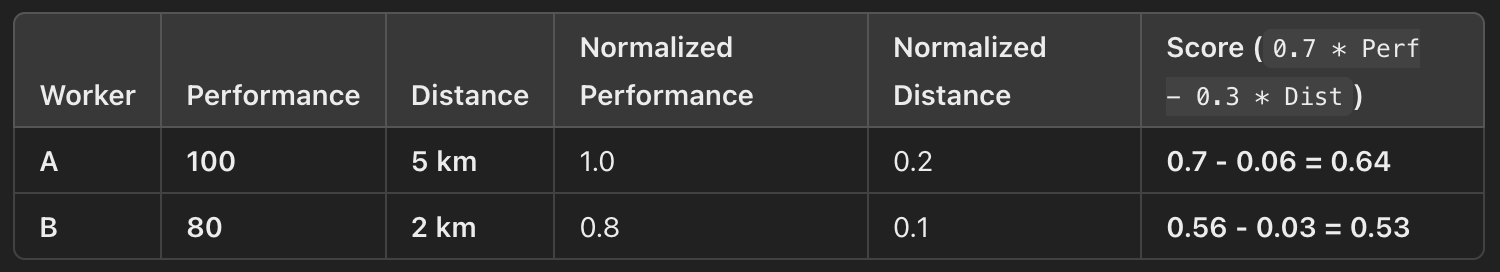


In [ ]:
# Set weights (can be adjusted)
alpha = 0.7  # Performance weight
beta = 0.3   # Distance weight

print(df_fore.iloc[0])
# Extract required work details
work_requ = df_fore.iloc[0]["Work Requirement"]  # Required work amount
work_type = df_fore.iloc[0]["Work_type"]  # Required work type
farm = df_fore.iloc[0]["Farm"]  # Required farm

print(f"Finding workers for '{work_type}' at '{farm}' with total requirement {work_requ:.2f}")




Date                2025-01-24
Work_type              Harvest
Farm                   Central
Work Requirement       1388.41
Name: 0, dtype: object
Finding workers for 'Harvest' at 'Central' with total requirement 1388.41


###Step 1: Filter Workers Closest to the Required Farm

In [ ]:
# Select workers whose closest farm matches the required farm
workers_near_farm = ranked_farms_df[ranked_farms_df["1_Farm"] == farm]

# Display filtered workers
workers_near_farm


,Worker_id,1_Farm,2_Farm,3_Farm,4_Farm,5_Farm
24,812688,Central,East,South,West,North
32,830212,Central,West,East,South,North
34,832478,Central,West,East,South,North
39,834644,Central,West,East,South,North
41,835764,Central,West,East,South,North
...,...,...,...,...,...,...
37368,90485133,Central,East,South,West,North
37374,90807265,Central,East,South,West,North
37375,90811404,Central,East,South,West,North
37379,91048533,Central,South,East,West,North


###Step 2: Find Workers Who Have Done the Required Work Type

In [ ]:
# Merge with performance data
eligible_workers = workers_near_farm.merge(avg_performance_pivot, on="Worker_id", how="left")


# Keep only workers who have experience in the required work type
eligible_workers = eligible_workers[eligible_workers[work_type] > 0]

eligible_workers


,Worker_id,1_Farm,2_Farm,3_Farm,4_Farm,5_Farm,Harvest,Packing,Planting,Pruning
0,812688,Central,East,South,West,North,23.142857,0.0,0.0,0.0
2,832478,Central,West,East,South,North,26.837209,0.0,0.0,0.0
3,834644,Central,West,East,South,North,30.534091,0.0,0.0,0.0
4,835764,Central,West,East,South,North,15.265306,0.0,0.0,0.0
5,836494,Central,West,East,South,North,40.259542,0.0,0.0,366.8
...,...,...,...,...,...,...,...,...,...,...
6384,90484812,Central,West,East,South,North,27.415929,0.0,0.0,0.0
6386,90807265,Central,East,South,West,North,9.222222,0.0,0.0,0.0
6387,90811404,Central,East,South,West,North,23.083333,0.0,0.0,0.0
6388,91048533,Central,South,East,West,North,15.000000,0.0,0.0,0.0


###Step 3: Left Join Distance table to get numerical value of distance for Normalization

In [ ]:
# Get the correct distance column for the selected farm
distance_column = f"{farm}_Farm_Distance"

# Merge with distance data
eligible_workers = eligible_workers.merge(avg_distance[["Worker_id", distance_column]], on="Worker_id", how="left")

print(eligible_workers)



      Worker_id   1_Farm 2_Farm 3_Farm 4_Farm 5_Farm    Harvest  Packing  \
0        812688  Central   East  South   West  North  23.142857      0.0   
1        832478  Central   West   East  South  North  26.837209      0.0   
2        834644  Central   West   East  South  North  30.534091      0.0   
3        835764  Central   West   East  South  North  15.265306      0.0   
4        836494  Central   West   East  South  North  40.259542      0.0   
...         ...      ...    ...    ...    ...    ...        ...      ...   
5607   90484812  Central   West   East  South  North  27.415929      0.0   
5608   90807265  Central   East  South   West  North   9.222222      0.0   
5609   90811404  Central   East  South   West  North  23.083333      0.0   
5610   91048533  Central  South   East   West  North  15.000000      0.0   
5611   91209149  Central   West   East  South  North  12.000000      0.0   

      Planting  Pruning  Central_Farm_Distance  
0          0.0      0.0               

###Step 4: Normalization on performance and distance and Calucation of Weighted Score on Each worker

In [ ]:
# Normalize performance and distance
eligible_workers["Normalized_Performance"] = eligible_workers[work_type] / eligible_workers[work_type].max()
eligible_workers["Normalized_Distance"] = eligible_workers[distance_column] / eligible_workers[distance_column].max()

# Compute weighted score (higher score is better)
eligible_workers["Score"] = (alpha * eligible_workers["Normalized_Performance"]) - (beta * eligible_workers["Normalized_Distance"])

# Sort workers by highest score (best balance of performance and distance)
eligible_workers = eligible_workers.sort_values(by="Score", ascending=False)

print(eligible_workers)

      Worker_id   1_Farm 2_Farm 3_Farm 4_Farm 5_Farm     Harvest  Packing  \
4943   76938408  Central   East  South   West  North  111.239130      0.0   
3238   72537331  Central   East  South   West  North   97.277778      0.0   
4379   75914704  Central   East  South   West  North   97.461538      0.0   
3016   71585901  Central   East  South   West  North   96.825000      0.0   
3909   74769956  Central   East  South   West  North   95.527273      0.0   
...         ...      ...    ...    ...    ...    ...         ...      ...   
2889   71003805  Central  South   East   West  North    3.000000      0.0   
1794   47713191  Central  South   East   West  North    1.000000      0.0   
728    43200621  Central  South   East   West  North   11.454545      0.0   
4507   76212251  Central   West   East  South  North    6.666667      0.0   
4930   76918291  Central   East  South   West  North   28.111111      0.0   

      Planting  Pruning  Central_Farm_Distance  Normalized_Performance  \
4

###Step 5: Select Workers Until Work Requirement is Met

In [ ]:
# Select workers until work requirement is met
selected_workers = []
total_performance = 0

for _, row in eligible_workers.iterrows():
    selected_workers.append((row["Worker_id"], row[work_type], row[distance_column], row["Score"]))
    total_performance += row[work_type]

    if total_performance >= work_requ:
        break

# Convert to DataFrame
selected_workers_df = pd.DataFrame(selected_workers, columns=["Worker_id", "Performance", "Distance", "Score"])

# Display selected workers
print(f"Selected {len(selected_workers)} workers to meet the requirement of {work_requ:.2f}")
print(selected_workers_df)
print("Total score : ", sum(selected_workers_df.Score))




Selected 16 workers to meet the requirement of 1388.41
    Worker_id  Performance  Distance     Score
0    76938408   111.239130      25.9  0.625145
1    72537331    97.277778      23.8  0.543359
2    75914704    97.461538      26.3  0.537290
3    71585901    96.825000      25.9  0.534440
4    74769956    95.527273      26.8  0.523673
5    45181549    92.047619      26.8  0.501776
6    76611600    90.590909      27.0  0.492031
7    72537250    89.250000      26.6  0.484749
8    75940019    85.000000      21.6  0.472456
9    73463206    87.354167      26.8  0.472241
10   71203430    85.068027      26.0  0.460167
11   60003161    82.637931      22.1  0.456147
12   48948715    84.500000      27.2  0.453125
13   71969983    83.630435      27.1  0.447942
14   47265183    83.000000      26.5  0.445709
15   76869419    84.455446      31.8  0.439549
Total score :  7.8897975547124855


###Step 4.b: Select Workers (Randomly not by Ranking) Until Work Requirement is Met

In [ ]:
# Select workers until work requirement is met
selected_workers2 = []
total_performance2 = 0
shuffled_workers = eligible_workers.sample(frac=1, random_state=42)  # Set random_state for reproducibility

for _, row in shuffled_workers.iterrows():
    selected_workers2.append((row["Worker_id"], row[work_type], row[distance_column], row["Score"]))
    total_performance2 += row[work_type]

    if total_performance2 >= work_requ:
        break

# Convert to DataFrame
selected_workers_df2 = pd.DataFrame(selected_workers2, columns=["Worker_id", "Performance", "Distance", "Score"])

# Display selected workers
print(f"Selected {len(selected_workers2)} workers to meet the requirement of {work_requ:.2f}")
print(selected_workers_df2)
print("Total score : ", sum(selected_workers_df2.Score))




Selected 49 workers to meet the requirement of 1388.41
    Worker_id  Performance  Distance     Score
0    76410508    18.000000      38.9  0.000842
1    48698057    15.392157      19.3  0.041079
2    43126160    33.869565      26.5  0.136543
3    45126685    45.000000      26.6  0.206295
4    48397035    14.833333      26.8  0.015886
5    18906253    10.000000      26.7 -0.014240
6     2873660    49.200000      22.0  0.246019
7    76765919    10.545455      22.0  0.002776
8    74929240    52.727273      22.4  0.267060
9    45119174    18.736842      30.9  0.028600
10   43932096    39.250000       2.1  0.240921
11   41527955    30.929936      21.7  0.131918
12   47997667    43.543478      25.8  0.199442
13   47298671    34.272727      25.7  0.141392
14   71570758    35.142857      20.1  0.163053
15   76754311    11.588235      40.8 -0.044997
16   76464298    16.714286      20.3  0.046508
17   41973432    27.000000      25.5  0.096205
18   46082340     9.333333      26.0 -0.016412
19   

###Step 6: Choose a Target Date from forecast selecting worker from Rank 1 to 5 until requirement met.

In [ ]:

# Define the target date
target_date = "2025-01-24"

# Extract all rows with the same date
work_requirements = df_fore[df_fore["Date"] == target_date].copy()

# Initialize a list to store all selected workers
selected_workers_all = []

# Create a copy of available workers
available_workers = ranked_farms_df.copy()

# Iterate through each work requirement
for _, row in work_requirements.iterrows():
    work_requ = row["Work Requirement"]  # Required work amount
    work_type = row["Work_type"]  # Required work type
    farm = row["Farm"]  # Required farm

    print(f"\nFinding workers for '{work_type}' at '{farm}' on {target_date} (Requirement: {work_requ:.2f})")

    # Select workers until work requirement is met
    selected_workers = []
    total_performance = 0
    rank = 1 # Start with the closest farm

    while total_performance < work_requ and rank <= 5:
        print(f"Checking Rank {rank} farms...")

        farm_column = f"{rank}_Farm"

        # Filter workers whose closest farm matches the required farm
        workers_near_farm = available_workers[available_workers[farm_column] == farm]


        # Merge with performance data
        eligible_workers = workers_near_farm.merge(avg_performance_pivot, on="Worker_id", how="left")

        # Keep only workers with experience in the required work type
        eligible_workers = eligible_workers[eligible_workers[work_type] > 0]

        # Get the correct distance column
        distance_column = f"{farm}_Farm_Distance"

        # Merge with distance data
        eligible_workers = eligible_workers.merge(avg_distance[["Worker_id", distance_column]], on="Worker_id", how="left")

        # Normalize performance and distance
        eligible_workers["Normalized_Performance"] = eligible_workers[work_type] / eligible_workers[work_type].max()
        eligible_workers["Normalized_Distance"] = eligible_workers[distance_column] / eligible_workers[distance_column].max()

        # Compute weighted score (higher score is better)
        alpha, beta = 0.7, 0.3
        eligible_workers["Score"] = (alpha * eligible_workers["Normalized_Performance"]) - (beta * eligible_workers["Normalized_Distance"])

        # Sort workers by best score
        eligible_workers = eligible_workers.sort_values(by="Score", ascending=False)
        print(eligible_workers)



        for _, worker in eligible_workers.iterrows():

            selected_workers.append((worker["Worker_id"], work_type, farm, worker[distance_column], worker[work_type], worker["Score"]))
            total_performance += worker[work_type]

            # Stop when the requirement is met
            if total_performance >= work_requ:
                break

        # Move to the next closest farm if requirement not met
        rank += 1

    # Convert selected workers to DataFrame
    selected_workers_df = pd.DataFrame(selected_workers, columns=["Worker_id", "Work_Type", "Farm","Distance", "Performance", "Score"])
    selected_workers_all.append(selected_workers_df)

    # **Remove selected workers from the available pool to enforce constraints**
    # ~ is for negates the condition, selecting only workers not already assigned.
    available_workers = available_workers[~available_workers["Worker_id"].isin(selected_workers_df["Worker_id"])]

# Combine all selected workers into a final DataFrame
final_selected_workers = pd.concat(selected_workers_all, ignore_index=True)




Finding workers for 'Harvest' at 'Central' on 2025-01-24 (Requirement: 1388.41)
Checking Rank 1 farms...
      Worker_id   1_Farm 2_Farm 3_Farm 4_Farm 5_Farm     Harvest  Packing  \
4943   76938408  Central   East  South   West  North  111.239130      0.0   
3238   72537331  Central   East  South   West  North   97.277778      0.0   
4379   75914704  Central   East  South   West  North   97.461538      0.0   
3016   71585901  Central   East  South   West  North   96.825000      0.0   
3909   74769956  Central   East  South   West  North   95.527273      0.0   
...         ...      ...    ...    ...    ...    ...         ...      ...   
2889   71003805  Central  South   East   West  North    3.000000      0.0   
1794   47713191  Central  South   East   West  North    1.000000      0.0   
728    43200621  Central  South   East   West  North   11.454545      0.0   
4507   76212251  Central   West   East  South  North    6.666667      0.0   
4930   76918291  Central   East  South   West  

In [ ]:
final_selected_workers


,Worker_id,Work_Type,Farm,Distance,Performance,Score
0,76938408,Harvest,Central,25.9,111.239130,0.625145
1,72537331,Harvest,Central,23.8,97.277778,0.543359
2,75914704,Harvest,Central,26.3,97.461538,0.537290
3,71585901,Harvest,Central,25.9,96.825000,0.534440
4,74769956,Harvest,Central,26.8,95.527273,0.523673
...,...,...,...,...,...,...
1543,48356415,Planting,South,9.9,1.000000,0.675854
1544,62116819,Planting,South,10.3,1.000000,0.674878
1545,73319188,Planting,South,10.5,1.000000,0.674390
1546,75159048,Pruning,West,9.2,2190.571429,0.675895


In [ ]:
print(sum(final_selected_workers['Score']))

487.45255146309603


In [ ]:

# Define the target date
target_date = "2025-01-25"

# Extract all rows with the same date
work_requirements = df_fore[df_fore["Date"] == target_date].copy()

# Initialize a list to store all selected workers
selected_workers_all = []

# Create a copy of available workers
available_workers = ranked_farms_df.copy()

# Iterate through each work requirement
for _, row in work_requirements.iterrows():
    work_requ = row["Work Requirement"]  # Required work amount
    work_type = row["Work_type"]  # Required work type
    farm = row["Farm"]  # Required farm

    print(f"\nFinding workers for '{work_type}' at '{farm}' on {target_date} (Requirement: {work_requ:.2f})")

    # Select workers until work requirement is met
    selected_workers = []
    total_performance = 0
    rank = 1 # Start with the closest farm

    while total_performance < work_requ and rank <= 5:
        print(f"Checking Rank {rank} farms...")

        farm_column = f"{rank}_Farm"

        # Filter workers whose closest farm matches the required farm
        workers_near_farm = available_workers[available_workers[farm_column] == farm]


        # Merge with performance data
        eligible_workers = workers_near_farm.merge(avg_performance_pivot, on="Worker_id", how="left")

        # Keep only workers with experience in the required work type
        eligible_workers = eligible_workers[eligible_workers[work_type] > 0]

        # Get the correct distance column
        distance_column = f"{farm}_Farm_Distance"

        # Merge with distance data
        eligible_workers = eligible_workers.merge(avg_distance[["Worker_id", distance_column]], on="Worker_id", how="left")

        # Normalize performance and distance
        eligible_workers["Normalized_Performance"] = eligible_workers[work_type] / eligible_workers[work_type].max()
        eligible_workers["Normalized_Distance"] = eligible_workers[distance_column] / eligible_workers[distance_column].max()

        # Compute weighted score (higher score is better)
        alpha, beta = 0.7, 0.3
        eligible_workers["Score"] = (alpha * eligible_workers["Normalized_Performance"]) - (beta * eligible_workers["Normalized_Distance"])

        # Sort workers by best score
        eligible_workers = eligible_workers.sort_values(by="Score", ascending=False)
        print(eligible_workers)



        for _, worker in eligible_workers.iterrows():

            selected_workers.append((worker["Worker_id"], work_type, farm, worker[distance_column], worker[work_type], worker["Score"]))
            total_performance += worker[work_type]

            # Stop when the requirement is met
            if total_performance >= work_requ:
                break

        # Move to the next closest farm if requirement not met
        rank += 1

    # Convert selected workers to DataFrame
    selected_workers_df = pd.DataFrame(selected_workers, columns=["Worker_id", "Work_Type", "Farm", "Distance", "Performance", "Score"])
    selected_workers_all.append(selected_workers_df)

    # **Remove selected workers from the available pool to enforce constraints**
    # ~ is for negates the condition, selecting only workers not already assigned.
    available_workers = available_workers[~available_workers["Worker_id"].isin(selected_workers_df["Worker_id"])]

# Combine all selected workers into a final DataFrame
final_selected_workers = pd.concat(selected_workers_all, ignore_index=True)




Finding workers for 'Harvest' at 'Central' on 2025-01-25 (Requirement: 1192.66)
Checking Rank 1 farms...
      Worker_id   1_Farm 2_Farm 3_Farm 4_Farm 5_Farm     Harvest  Packing  \
4943   76938408  Central   East  South   West  North  111.239130      0.0   
3238   72537331  Central   East  South   West  North   97.277778      0.0   
4379   75914704  Central   East  South   West  North   97.461538      0.0   
3016   71585901  Central   East  South   West  North   96.825000      0.0   
3909   74769956  Central   East  South   West  North   95.527273      0.0   
...         ...      ...    ...    ...    ...    ...         ...      ...   
2889   71003805  Central  South   East   West  North    3.000000      0.0   
1794   47713191  Central  South   East   West  North    1.000000      0.0   
728    43200621  Central  South   East   West  North   11.454545      0.0   
4507   76212251  Central   West   East  South  North    6.666667      0.0   
4930   76918291  Central   East  South   West  

In [ ]:
final_selected_workers.head(20)


,Worker_id,Work_Type,Farm,Distance,Performance,Score
0,76938408,Harvest,Central,25.9,111.239130,0.625145
1,72537331,Harvest,Central,23.8,97.277778,0.543359
2,75914704,Harvest,Central,26.3,97.461538,0.537290
3,71585901,Harvest,Central,25.9,96.825000,0.534440
4,74769956,Harvest,Central,26.8,95.527273,0.523673
5,45181549,Harvest,Central,26.8,92.047619,0.501776
6,76611600,Harvest,Central,27.0,90.590909,0.492031
7,72537250,Harvest,Central,26.6,89.250000,0.484749
8,75940019,Harvest,Central,21.6,85.000000,0.472456
9,73463206,Harvest,Central,26.8,87.354167,0.472241


In [ ]:
print(sum(final_selected_workers['Score']))

414.2937717634817


#Apply Evolutionary Algorithem

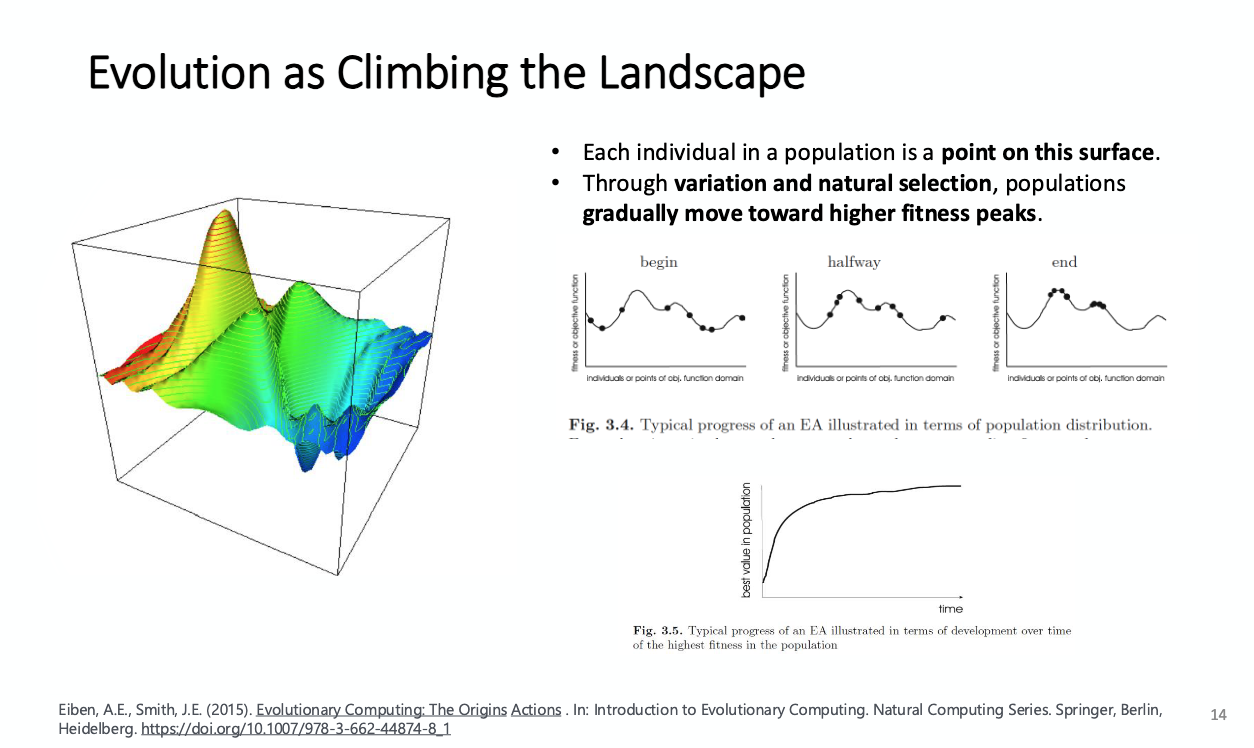

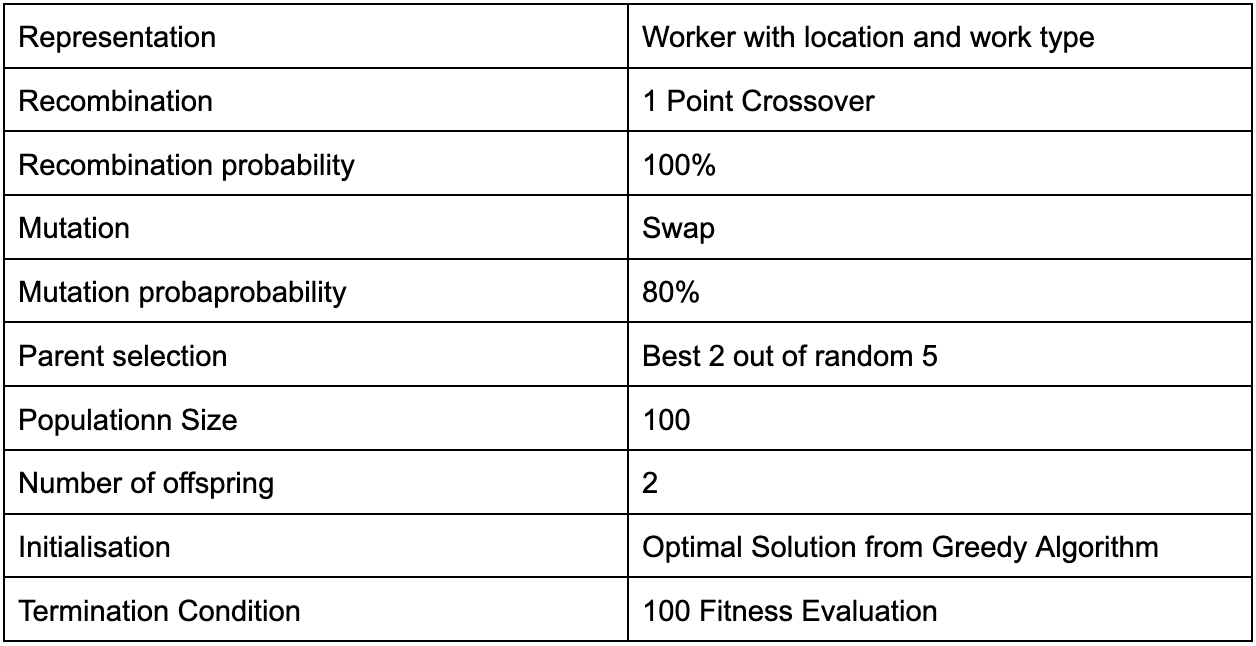


#Step 1: Define the Genetic Representation (Chromosome Encoding)

Each solution (or individual) in the population represents a worker assignment plan for all farms and work types. eg. (76938408 	Harvest 	Central)

#Step 2: Define the Fitness Function
The fitness function evaluates each worker-farm assignment based on:



*   Maximizing total worker performance
*   Minimizing total worker distance

*   Ensuring work requirements are met



##Fitness Calculation
###Fitness=α x ∑Worker Performance - β  x ∑Worker Distance - γ x ∑Work Requirement Violations


Where:

    α (alpha) controls performance weighting (default: 0.7)
    β (beta) controls distance weighting (default: 0.3)
    γ (gamma) is a penalty factor for farms that do not meet the required workers

In [ ]:
def fitness(individual, avg_performance_pivot, avg_distance, work_requirements):
    """Calculates the fitness score of a worker-farm assignment."""
    total_performance = 0
    total_distance = 0
    work_fulfillment = {}
    worker_count = {}  # Track number of workers per farm and type

    max_performance = avg_performance_pivot.iloc[:, 1:].max().max()
    max_distance = avg_distance.iloc[:, 1:6].max().max()

    if max_performance == 0:
        max_performance = 1  # Avoid division by zero
    if max_distance == 0:
        max_distance = 1

    for worker_id, farm, work_type in individual:
        try:
            performance = avg_performance_pivot.loc[avg_performance_pivot["Worker_id"] == worker_id, work_type].values[0]
            distance = avg_distance.loc[avg_distance["Worker_id"] == worker_id, f"{farm}_Farm_Distance"].values[0]

            # Normalize performance and distance
            norm_performance = performance / max_performance
            norm_distance = distance / max_distance

            total_performance += norm_performance
            total_distance += norm_distance

            key = (farm, work_type)
            work_fulfillment[key] = work_fulfillment.get(key, 0) + performance
            #add worker into tracking record
            worker_count[key] = worker_count.get(key, 0) + 1

        except IndexError:
            continue


    penalty = 0
    for _, row in work_requirements.iterrows():
        farm, work_type, required = row["Farm"], row["Work_type"], row["Work Requirement"]
        assigned_work = work_fulfillment.get((farm, work_type), 0)

        #shortfall = max(0, required - assigned_work)  # Shortfall only, no negative penalties
        #penalty += ( shortfall / required ) * 50
        if assigned_work < required:
            penalty += (required - assigned_work) * 0.1


        print(f"Farm: {farm}, Work_Type: {work_type}, Required: {required}, Assigned: {assigned_work}, Workers Assigned: {worker_count.get((farm, work_type), 0)}")

    print(f"Total Performance: {total_performance}, Total Distance: {total_distance}, Total Penalty: {penalty}")

    return (0.7 * total_performance) - (0.3 * total_distance) - penalty  # Reduce penalty impact


##Step 3: Genetic Operators
 1. Parent Selection – Tournament Selection

We randomly select K solutions, and the best one survives.
In this case we run tournament twice to select both parent

In [ ]:
import random

def tournament_selection(population, k=5):
    """Selects the best individual from a random subset."""
    selected = random.sample(population, k)
    return max(selected, key=lambda ind: fitness(ind, avg_performance_pivot, avg_distance, work_requirements))


2. Crossover - One-Point Crossover

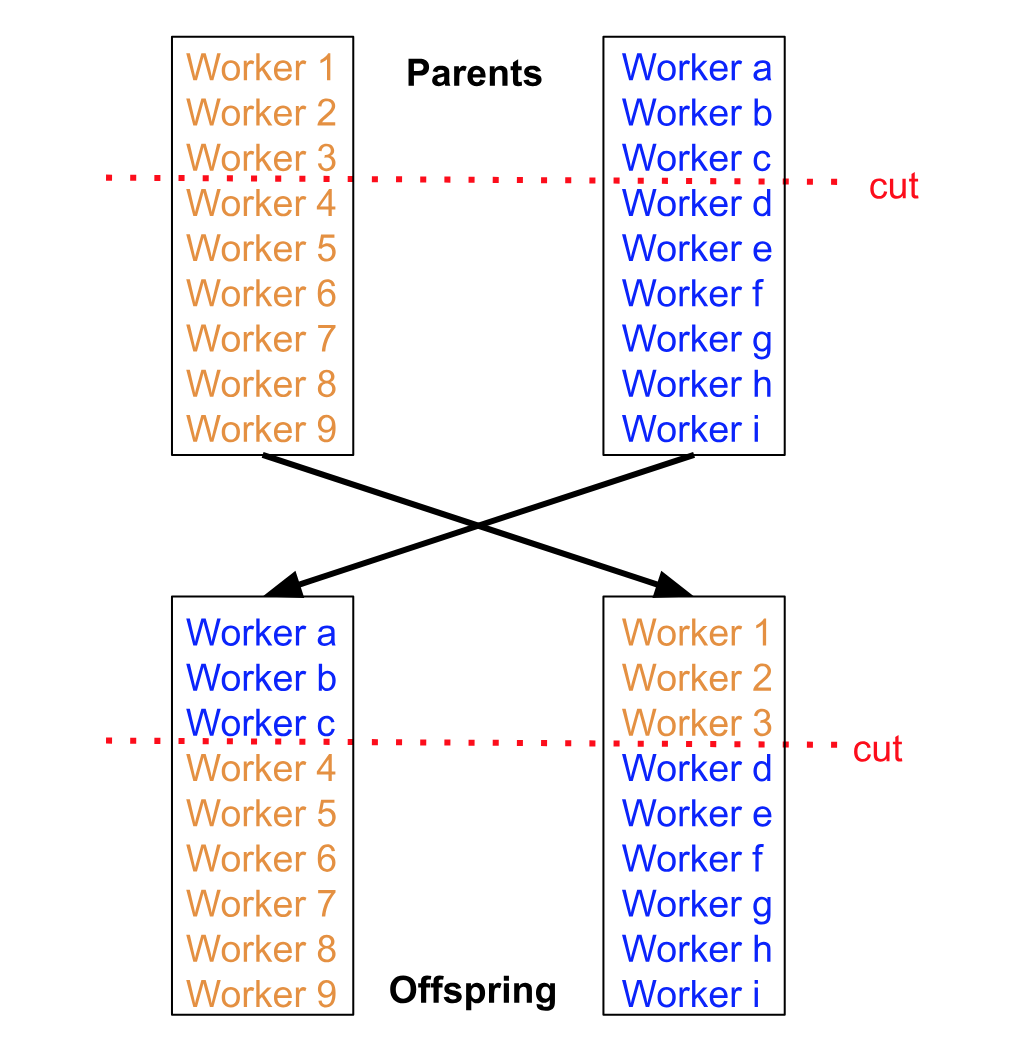

In [ ]:
def crossover(parent1, parent2, all_workers):
    """Performs one-point crossover between two parents."""
    point = random.randint(0, len(parent1) - 1)
    child1 = parent1[:point] + parent2[point:]
    child2 = parent2[:point] + parent1[point:]

    # Ensure uniqueness of workers
    def remove_duplicates(child):
        seen_workers = set()  # Track assigned workers
        valid_child = []

        for worker_id, farm, work_type in child:
            if worker_id not in seen_workers:
                valid_child.append((worker_id, farm, work_type))
                seen_workers.add(worker_id)  # Mark worker as assigned
            else:
                # If duplicate, replace with a new unassigned worker
                unassigned_worker = random.choice(list(all_workers - seen_workers))
                seen_workers.add(unassigned_worker)
                valid_child.append((unassigned_worker, farm, work_type))

        return valid_child

    #apply duplicate removal
    child1 = remove_duplicates(child1)
    child2 = remove_duplicates(child2)

    return child1, child2


3. Mutation - Swap Mutation

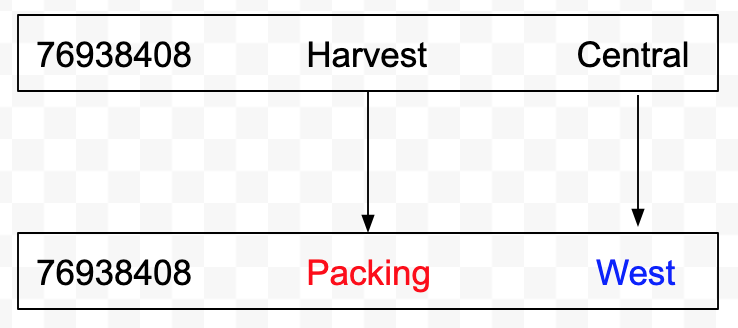

In [ ]:
def mutate(individual, ranked_farms, eligible_workers, mutation_rate=0.2):
    """
    Mutates a worker's farm and work type with a given probability.
    Also ensures work type experience of workers.
    """

    if random.random() < mutation_rate:
        index = random.randint(0, len(individual) - 1)
        worker_id, current_farm, current_work_type = individual[index]

        # Use probabilistic farm selection based on worker's ranked distances
        new_farm = probabilistic_farm_selection(worker_id, ranked_farms)
        while new_farm == current_farm:  # Ensure a different farm
            new_farm = probabilistic_farm_selection(worker_id, ranked_farms)

        # **Check if worker has experience with any work type**
        worker_row = eligible_workers[eligible_workers["Worker_id"] == worker_id]

        if worker_row.empty:
            print(f"Warning: Worker {worker_id} not found in eligible_workers.")
            new_work_type = current_work_type  # Keep current type if worker not found
        else:
            valid_work_types = [col for col in ["Harvest", "Packing", "Planting", "Pruning"] if worker_row[col].values[0] > 0]

            # Choose a new work type if valid ones exist; otherwise, keep the same work type
            new_work_type = random.choice(valid_work_types) if valid_work_types else current_work_type

        # Apply mutation
        individual[index] = (worker_id, new_farm, new_work_type)

    return individual  # Return the modified individual


4. Probabilistic Farm Selection for Initialization
  weighed by the rank of the distance among farm

In [ ]:
import random

def probabilistic_farm_selection(worker_id, ranked_farms):
    """Selects a farm probabilistically based on worker's ranked distances."""
    # Extract distances for this worker
    worker_distances = ranked_farms.loc[ranked_farms["Worker_id"] == worker_id].iloc[:, 1:6].values.flatten()

    # Convert distances to weights (inverse relationship: closer = higher weight)
    weights = 1 / (worker_distances + 1e-6)  # Avoid division by zero
    weights /= weights.sum()  # Normalize to sum to 1

    # Define farm names in ranked order
    farm_choices = ["North", "South", "East", "West", "Central"]

    # Select farm based on weighted probability
    return random.choices(farm_choices, weights=weights, k=1)[0]


##Step 4: Run the Evolutionary Algorithm

In [ ]:
import random

def evolutionary_algorithm(initial_assignment, avg_performance_pivot, avg_distance, work_requirements, pop_size=100, generations=100, crossover=crossover, fitness_history=None):
    """Runs genetic algorithm using greedy initial assignment as the starting point."""

    all_workers = set(avg_performance_pivot["Worker_id"].values)

    ranked_farms = avg_distance.copy()

    #Start with the Greedy Assignment Instead of Random Assignments
    population = [initial_assignment]  # First individual is the greedy solution

    #Initialization
    for _ in range(pop_size - 1):  # Create variations of greedy solution
        new_assignment = []

        for worker_id, _, work_type in initial_assignment:
                # Assign farm probabilistically based on worker's distances
                new_farm = probabilistic_farm_selection(worker_id, ranked_farms)
                new_assignment.append((worker_id, new_farm, work_type))

        population.append(new_assignment)

    for gen in range(generations):
        #Evaluate fitness for all
        population = sorted(population, key=lambda ind: fitness(ind, avg_performance_pivot, avg_distance, work_requirements), reverse=True)

        best_fitness = fitness(population[0], avg_performance_pivot, avg_distance, work_requirements)
        print(f"Generation {gen}: Best Fitness = {best_fitness}")

        #Append fitness score
        if fitness_history is not None:
            fitness_history.append(best_fitness)

        #Genetic Selection
        offspring = []
        for _ in range(pop_size // 2):
            parent1 = tournament_selection(population)
            parent2 = tournament_selection(population)
            child1, child2 = crossover(parent1, parent2, all_workers)
            mutate(child1, ranked_farms, eligible_workers)
            mutate(child2, ranked_farms, eligible_workers)
            offspring.extend([child1, child2])

        #Survivor Selection:
        #Keep the Best from Parents & Offspring
        # Merge parents & offspring
        combined_population = population + offspring
        combined_population = sorted(combined_population, key=lambda ind: fitness(ind, avg_performance_pivot, avg_distance, work_requirements), reverse=True)

        #Keep only 100 individuals
        population = combined_population[:pop_size]


    return population[0]


##Step 5: Run the Algorithm

In [ ]:
# Define the target date
target_date = "2025-01-24"

# Extract all rows with the same date
work_requirements = df_fore[df_fore["Date"] == target_date].copy()



In [ ]:
# Convert initial_assignment DataFrame into list of tuples (Worker_id, Farm, Work_Type)
initial_assignment_list = list(final_selected_workers[["Worker_id", "Farm", "Work_Type"]].itertuples(index=False, name=None))


In [ ]:
fitness_history = []
best_solution = evolutionary_algorithm(initial_assignment_list, avg_performance_pivot, avg_distance, work_requirements,fitness_history=fitness_history)
print("Best Worker-Farm Assignment:", best_solution)

Streaming output truncated to the last 5000 lines.
Farm: South, Work_Type: Harvest, Required: 25071.0, Assigned: 20238.9118180972, Workers Assigned: 291
Farm: Central, Work_Type: Planting, Required: 41.79997, Assigned: 42.0, Workers Assigned: 42
Farm: East, Work_Type: Planting, Required: 7.14334, Assigned: 8.0, Workers Assigned: 8
Farm: South, Work_Type: Planting, Required: 84.56332, Assigned: 85.0, Workers Assigned: 85
Farm: West, Work_Type: Pruning, Required: 2941.18091, Assigned: 16080.817713642637, Workers Assigned: 10
Total Performance: 20.442057478039946, Total Distance: 27.47144087430105, Total Penalty: 991.6098559207992
Farm: Central, Work_Type: Harvest, Required: 1388.41, Assigned: 1358.1366735737508, Workers Assigned: 16
Farm: East, Work_Type: Harvest, Required: 17657.46, Assigned: 13770.424687527859, Workers Assigned: 577
Farm: North, Work_Type: Harvest, Required: 4709.35, Assigned: 3542.648261593199, Workers Assigned: 45
Farm: South, Work_Type: Harvest, Required: 25071.0, A

###Generate a Fitness Score Plot

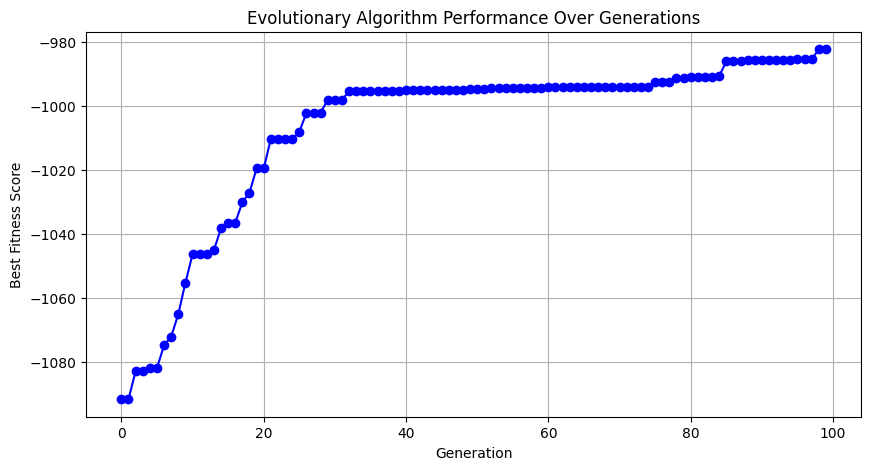

In [ ]:
import matplotlib.pyplot as plt

# Plot the saved fitness scores
plt.figure(figsize=(10, 5))
plt.plot(range(len(fitness_history)), fitness_history, marker='o', linestyle='-', color='b')
plt.xlabel("Generation")
plt.ylabel("Best Fitness Score")
plt.title("Evolutionary Algorithm Performance Over Generations")
plt.grid()
plt.show()


###Draw Multiple Plots to intepret the result

In [ ]:
import matplotlib.pyplot as plt

# Convert best_solution to DataFrame
df_best_solution = pd.DataFrame(best_solution, columns=["Worker_id", "Farm", "Work_Type"])

# Count workers per farm
worker_distribution = df_best_solution["Farm"].value_counts().reset_index()
worker_distribution.columns = ["Farm", "Worker_Count"]
worker_distribution


,Farm,Worker_Count
0,East,585
1,South,378
2,Central,58
3,North,44
4,West,9


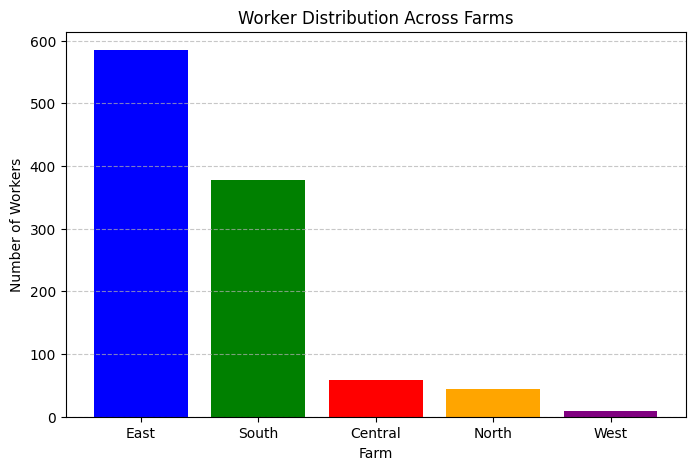

In [ ]:
# Plot worker distribution per farm
plt.figure(figsize=(8, 5))
plt.bar(worker_distribution["Farm"], worker_distribution["Worker_Count"], color=['blue', 'green', 'red', 'orange', 'purple'])

plt.xlabel("Farm")
plt.ylabel("Number of Workers")
plt.title("Worker Distribution Across Farms")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


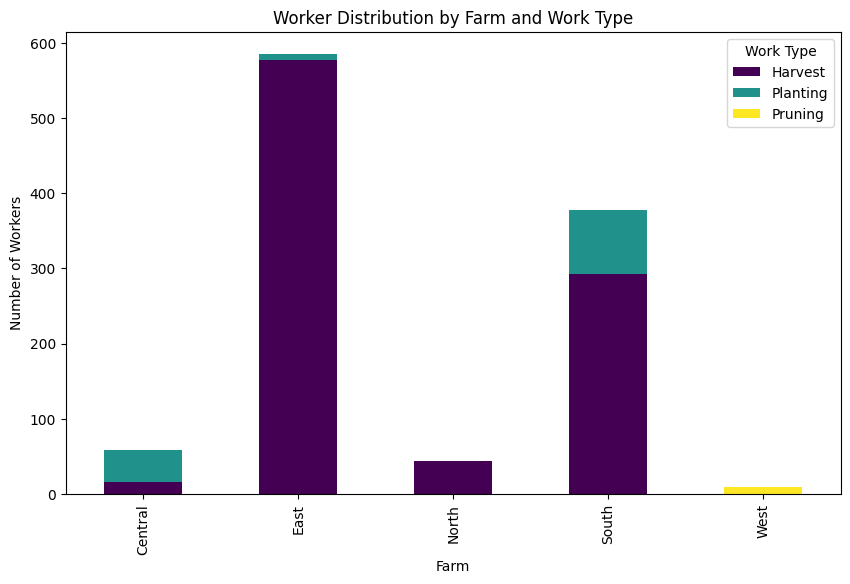

In [ ]:
# Count workers per farm and work type
worker_farm_type = df_best_solution.groupby(["Farm", "Work_Type"]).size().unstack()

# Plot stacked bar chart
worker_farm_type.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="viridis")

plt.xlabel("Farm")
plt.ylabel("Number of Workers")
plt.title("Worker Distribution by Farm and Work Type")
plt.legend(title="Work Type")

plt.show()

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Convert best_solution list to DataFrame
df_best_solution = pd.DataFrame(best_solution, columns=["Worker_id", "Farm", "Work_Type"])

# Create pivot table: Farms (rows) vs Work Types (columns)
heatmap_data = df_best_solution.pivot_table(index="Farm", columns="Work_Type", aggfunc="size", fill_value=0)

print(heatmap_data)  # View the data before plotting


Work_Type  Harvest  Planting  Pruning
Farm                                 
Central         16        42        0
East           577         8        0
North           44         0        0
South          293        85        0
West             0         0        9


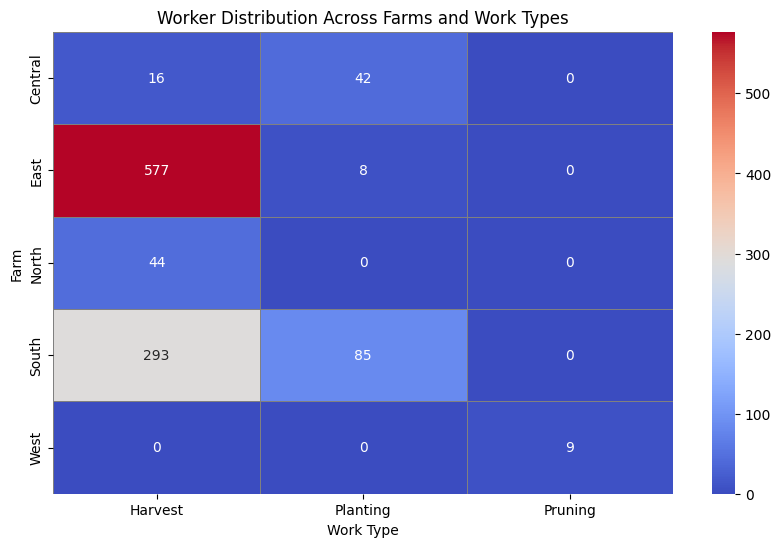

In [ ]:
# Set up the figure size
plt.figure(figsize=(10, 6))

# Create heatmap
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="coolwarm", linewidths=0.5, linecolor="gray")

# Labels and title
plt.xlabel("Work Type")
plt.ylabel("Farm")
plt.title("Worker Distribution Across Farms and Work Types")

# Show plot
plt.show()


##Compare Initial Assignment with Final Best Solution

In [ ]:
# Convert initial assignment DataFrame to pivot table
heatmap_data_initial = final_selected_workers.pivot_table(index="Farm", columns="Work_Type", aggfunc="size", fill_value=0)

print(heatmap_data_initial)  # View the initial data before plotting


Work_Type  Harvest  Planting  Pruning
Farm                                 
Central         13        42        0
East           563         8        0
North           70         0        0
South          281        85        0
West             0         0       12


In [ ]:
# Convert best_solution list to DataFrame
df_best_solution = pd.DataFrame(best_solution, columns=["Worker_id", "Farm", "Work_Type"])

# Create pivot table for final assignment
heatmap_data_final = df_best_solution.pivot_table(index="Farm", columns="Work_Type", aggfunc="size", fill_value=0)

print(heatmap_data_final)  # View the final data before plotting


Work_Type  Harvest  Planting  Pruning
Farm                                 
Central         16        42        0
East           577         8        0
North           44         0        0
South          293        85        0
West             0         0        9


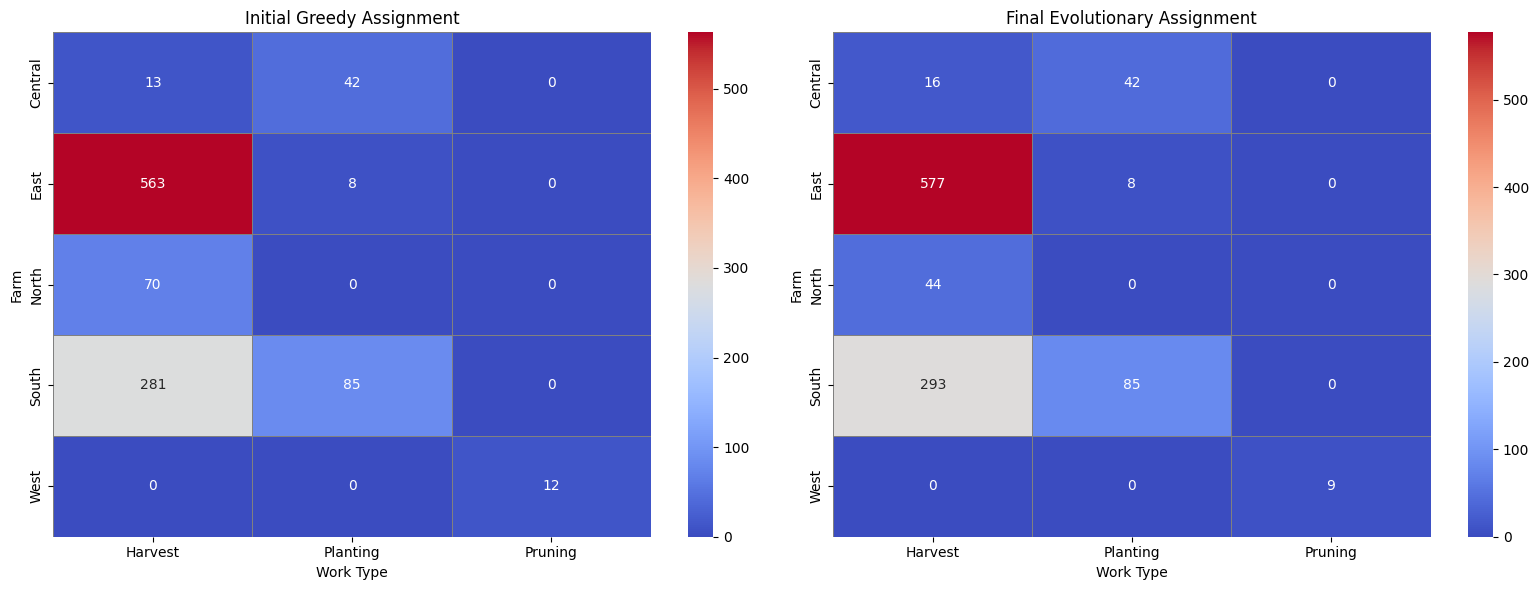

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up figure for side-by-side heatmaps
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Heatmap for Initial Assignment
sns.heatmap(heatmap_data_initial, annot=True, fmt="d", cmap="coolwarm", linewidths=0.5, linecolor="gray", ax=axes[0])
axes[0].set_title("Initial Greedy Assignment")
axes[0].set_xlabel("Work Type")
axes[0].set_ylabel("Farm")

# Heatmap for Final Optimized Assignment
sns.heatmap(heatmap_data_final, annot=True, fmt="d", cmap="coolwarm", linewidths=0.5, linecolor="gray", ax=axes[1])
axes[1].set_title("Final Evolutionary Assignment")
axes[1].set_xlabel("Work Type")
axes[1].set_ylabel("Farm")

# Show both heatmaps
plt.tight_layout()
plt.show()


In [ ]:
# Compute fitness for the initial greedy assignment
initial_fitness = fitness(initial_assignment_list, avg_performance_pivot, avg_distance, work_requirements)

# Compute fitness for the final optimized assignment
final_fitness = fitness(best_solution, avg_performance_pivot, avg_distance, work_requirements)

# Print results
print(f"Initial Greedy Assignment Fitness: {initial_fitness}")
print(f"Final Optimized Assignment Fitness: {final_fitness}")


Farm: Central, Work_Type: Harvest, Required: 1388.41, Assigned: 1194.7793724519336, Workers Assigned: 13
Farm: East, Work_Type: Harvest, Required: 17657.46, Assigned: 12657.876156949458, Workers Assigned: 563
Farm: North, Work_Type: Harvest, Required: 4709.35, Assigned: 5654.929551948305, Workers Assigned: 70
Farm: South, Work_Type: Harvest, Required: 25071.0, Assigned: 19315.443271884706, Workers Assigned: 281
Farm: Central, Work_Type: Planting, Required: 41.79997, Assigned: 42.0, Workers Assigned: 42
Farm: East, Work_Type: Planting, Required: 7.14334, Assigned: 8.0, Workers Assigned: 8
Farm: South, Work_Type: Planting, Required: 84.56332, Assigned: 85.0, Workers Assigned: 85
Farm: West, Work_Type: Pruning, Required: 2941.18091, Assigned: 19612.95435960537, Workers Assigned: 12
Total Performance: 21.719564573891464, Total Distance: 40.32445447157435, Total Penalty: 1094.8771198713903
Farm: Central, Work_Type: Harvest, Required: 1388.41, Assigned: 1358.1366735737508, Workers Assigned: 

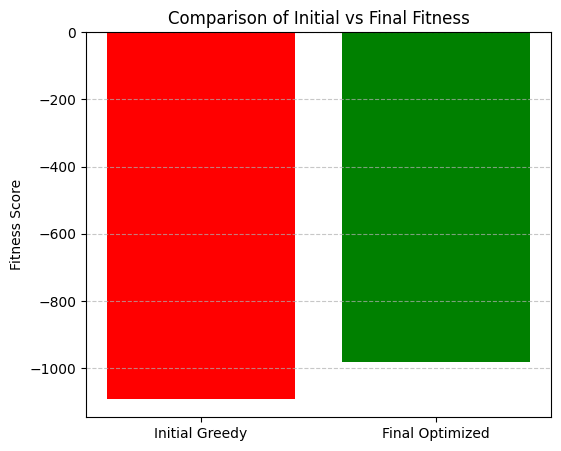

In [ ]:
import matplotlib.pyplot as plt

# Fitness scores
fitness_scores = [initial_fitness, final_fitness]
labels = ["Initial Greedy", "Final Optimized"]

# Plot
plt.figure(figsize=(6, 5))
plt.bar(labels, fitness_scores, color=["red", "green"])

# Labels and title
plt.ylabel("Fitness Score")
plt.title("Comparison of Initial vs Final Fitness")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()


##Issue and Improvement

### Discussion


*   Evolution Algorithm needs more computing power
*   Add Month into consideration (small worker poll for months)
*   Look Deep into planting, pruning and  harvest (High Output) relationship to predict future allocation





In [ ]:

df_solution = pd.DataFrame(best_solution, columns=["Worker_id", "Farm", "Work_Type"])
print(df_solution)


     Worker_id     Farm Work_Type
0     71585901  Central   Harvest
1     48860800  Central   Harvest
2     76938408  Central   Harvest
3     74353691  Central   Harvest
4     72537331  Central  Planting
..         ...      ...       ...
285   47391863     West   Pruning
286   42619728  Central   Pruning
287   76599593     West   Pruning
288   75089366  Central   Harvest
289   76537977     West   Pruning

[290 rows x 3 columns]


Generation 1: Best Fitness = -2141.733587241592
Total Performance: 67.14306078039861, Total Distance: 25.12062879807868
Farm: Central, Work_Type: Harvest, Required: 1192.66, Assigned: 916.0130317918887, Shortfall: 276.6469682081114
Farm: East, Work_Type: Harvest, Required: 12647.74, Assigned: 7721.734312709083, Shortfall: 4926.005687290917
Farm: North, Work_Type: Harvest, Required: 5597.51, Assigned: 1595.4482299021813, Shortfall: 4002.061770097819
Farm: South, Work_Type: Harvest, Required: 19253.01, Assigned: 6779.255644112375, Shortfall: 12473.754355887624
Farm: Central, Work_Type: Planting, Required: 41.79997, Assigned: 0, Shortfall: 41.79997
Farm: East, Work_Type: Planting, Required: 7.14334, Assigned: 0, Shortfall: 7.14334
Farm: South, Work_Type: Planting, Required: 84.56332, Assigned: 0.0, Shortfall: 84.56332
Farm: West, Work_Type: Pruning, Required: 19502.756, Assigned: 164051.72430290247, Shortfall: 0
Total Penalty: 21811.975411484473
Total Performance: 65.29281696887466, Total Distance: 26.167109396795368

In [ ]:
work_requirements

,Date,Work_type,Farm,Work Requirement
8,2025-01-25,Harvest,Central,1192.66000
9,2025-01-25,Harvest,East,12647.74000
10,2025-01-25,Harvest,North,5597.51000
11,2025-01-25,Harvest,South,19253.01000
12,2025-01-25,Planting,Central,41.79997
13,2025-01-25,Planting,East,7.14334
14,2025-01-25,Planting,South,84.56332
15,2025-01-25,Pruning,West,19502.75600


In [ ]:
print(best_solution[:10])

[(76389181, 'South', 'Pruning'), (75908141, 'Central', 'Packing'), (74561695, 'South', 'Packing'), (74355192, 'East', 'Pruning'), (73582917, 'South', 'Harvest'), (61123570, 'South', 'Packing'), (72376749, 'North', 'Planting'), (76256407, 'Central', 'Harvest'), (72482361, 'West', 'Packing'), (47489763, 'Central', 'Harvest')]


pop_size = 100, sample = 1000, gen = 100

```
# This is formatted as code
```



In [ ]:
best_solution = evolutionary_algorithm(avg_performance_pivot, avg_distance, work_requirements)
print("Best Worker-Farm Assignment:", best_solution)

Generation 0: Best Fitness = -5143.29511008792
Generation 1: Best Fitness = -4920.90810169649
Generation 2: Best Fitness = -4977.860350958364
Generation 3: Best Fitness = -4899.507917176686
Generation 4: Best Fitness = -4705.385866037689
Generation 5: Best Fitness = -4591.753513728055
Generation 6: Best Fitness = -4610.95838407219
Generation 7: Best Fitness = -4443.384601431978
Generation 8: Best Fitness = -4350.254084622165
Generation 9: Best Fitness = -4408.664309963764
Generation 10: Best Fitness = -4162.189620772801
Generation 11: Best Fitness = -4061.3762038796012
Generation 12: Best Fitness = -4010.3277075851342
Generation 13: Best Fitness = -3901.4858461541985
Generation 14: Best Fitness = -3834.5827313515993
Generation 15: Best Fitness = -3882.4305242207633
Generation 16: Best Fitness = -3822.831508817699
Generation 17: Best Fitness = -3813.444148458385
Generation 18: Best Fitness = -3790.619897540241
Generation 19: Best Fitness = -3668.6291605581755
Generation 20: Best Fitness

In [ ]:
best_solution

[(242763, 'Central', 'Packing'),
 (74812950, 'South', 'Packing'),
 (71128525, 'North', 'Harvest'),
 (61645667, 'West', 'Harvest'),
 (45892971, 'West', 'Harvest'),
 (78202140, 'West', 'Harvest'),
 (76166613, 'West', 'Harvest'),
 (77061453, 'East', 'Harvest'),
 (75100638, 'West', 'Pruning'),
 (40651860, 'North', 'Packing'),
 (76880895, 'South', 'Planting'),
 (46685497, 'East', 'Planting'),
 (74624815, 'South', 'Harvest'),
 (74371376, 'North', 'Pruning'),
 (76903164, 'Central', 'Planting'),
 (40959235, 'Central', 'Harvest'),
 (44228252, 'Central', 'Pruning'),
 (47373751, 'South', 'Harvest'),
 (60375076, 'North', 'Packing'),
 (49012547, 'Central', 'Pruning'),
 (61200761, 'North', 'Pruning'),
 (45485512, 'East', 'Pruning'),
 (75537315, 'South', 'Harvest'),
 (75940319, 'East', 'Harvest'),
 (80352271, 'East', 'Harvest'),
 (72509472, 'West', 'Packing'),
 (45845706, 'West', 'Pruning'),
 (42199032, 'North', 'Planting'),
 (75757548, 'North', 'Harvest'),
 (73327351, 'North', 'Harvest'),
 (75701928

In [ ]:
len(best_solution)

1000

In [ ]:

df_solution = pd.DataFrame(best_solution, columns=["Worker_id", "Farm", "Work_Type"])
print(df_solution)


     Worker_id     Farm Work_Type
0       242763  Central   Packing
1     74812950    South   Packing
2     71128525    North   Harvest
3     61645667     West   Harvest
4     45892971     West   Harvest
..         ...      ...       ...
995   47366464     East   Harvest
996   41135724    South  Planting
997   71103899    North   Packing
998   45211419  Central   Pruning
999   48780733     East  Planting

[1000 rows x 3 columns]


In [ ]:
# Merge to get worker performance for the assigned work type
df_solution = df_solution.merge(avg_performance_pivot, on="Worker_id", how="left")

# Extract the correct performance column based on assigned work type
df_solution["Performance"] = df_solution.apply(lambda row: row[row["Work_Type"]], axis=1)

# Keep only relevant columns
df_solution = df_solution[["Worker_id", "Farm", "Work_Type", "Performance"]]

print(df_solution.head())


   Worker_id     Farm Work_Type  Performance
0   71585901  Central   Harvest    96.825000
1   48860800  Central   Harvest    99.219512
2   76938408  Central   Harvest   111.239130
3   74353691  Central   Harvest    98.506329
4   72537331  Central  Planting     1.000000


In [ ]:
df_grouped = df_solution.groupby(["Farm", "Work_Type"]).agg(
    Total_Workers=("Worker_id", "count"),
    Total_Performance=("Performance", "sum")
).reset_index()

print(df_grouped)


       Farm Work_Type  Total_Workers  Total_Performance
0   Central   Harvest             14        1203.182337
1   Central   Packing              3           0.000000
2   Central  Planting             18          17.000000
3   Central   Pruning              9        5193.117217
4      East   Harvest             42        3001.180895
5      East   Packing              2           0.000000
6      East  Planting             11           8.000000
7      East   Pruning              2           0.000000
8     North   Harvest             38        2380.811985
9     North  Planting              1           0.000000
10    North   Pruning              1           0.000000
11    South   Harvest             58        2357.197005
12    South   Packing              3           0.000000
13    South  Planting              8           3.000000
14    South   Pruning              4        3564.024642
15     West   Harvest              3         138.890000
16     West   Pruning             73       92078

In [ ]:
# Ensure both DataFrames have consistent column names
df_grouped.rename(columns={"Work_Type": "Work_type"}, inplace=True)
work_requirements.rename(columns={"Work Type": "Work_type"}, inplace=True)


In [ ]:
df_grouped = df_grouped.merge(work_requirements, on=["Farm", "Work_type"], how="left")
df_grouped.rename(columns={"Work Requirement": "Required_Performance"}, inplace=True)

# Ensure Required_Performance is numeric
df_grouped["Required_Performance"] = pd.to_numeric(df_grouped["Required_Performance"], errors="coerce")

# Check if requirements are met
df_grouped["Performance_Met"] = df_grouped["Total_Performance"] >= df_grouped["Required_Performance"]

print(df_grouped)


       Farm Work_type  Total_Workers  Total_Performance        Date  \
0   Central   Harvest             14        1203.182337  2025-01-25   
1   Central   Packing              3           0.000000         NaN   
2   Central  Planting             18          17.000000  2025-01-25   
3   Central   Pruning              9        5193.117217         NaN   
4      East   Harvest             42        3001.180895  2025-01-25   
5      East   Packing              2           0.000000         NaN   
6      East  Planting             11           8.000000  2025-01-25   
7      East   Pruning              2           0.000000         NaN   
8     North   Harvest             38        2380.811985  2025-01-25   
9     North  Planting              1           0.000000         NaN   
10    North   Pruning              1           0.000000         NaN   
11    South   Harvest             58        2357.197005  2025-01-25   
12    South   Packing              3           0.000000         NaN   
13    

In [ ]:
df_grouped

,Farm,Work_type,Total_Workers,Total_Performance,Date,Required_Performance,Performance_Met
0,Central,Harvest,14,1203.182337,2025-01-25,1192.66000,True
1,Central,Packing,3,0.000000,NaN,NaN,False
2,Central,Planting,18,17.000000,2025-01-25,41.79997,False
3,Central,Pruning,9,5193.117217,NaN,NaN,False
4,East,Harvest,42,3001.180895,2025-01-25,12647.74000,False
5,East,Packing,2,0.000000,NaN,NaN,False
6,East,Planting,11,8.000000,2025-01-25,7.14334,True
7,East,Pruning,2,0.000000,NaN,NaN,False
8,North,Harvest,38,2380.811985,2025-01-25,5597.51000,False
9,North,Planting,1,0.000000,NaN,NaN,False


Execution output
2KB
	Stream
		Generation 0: Best Fitness = -5087.21338127771
		Generation 1: Best Fitness = -4955.052979457389
		Generation 2: Best Fitness = -4876.11315044687
		Generation 3: Best Fitness = -4698.354887914464
		Generation 4: Best Fitness = -4785.658469424414
		Generation 5: Best Fitness = -4478.899400036009
		Generation 6: Best Fitness = -4400.036798799511
		Generation 7: Best Fitness = -4301.076959321635
		Generation 8: Best Fitness = -4208.419699857446
		Generation 9: Best Fitness = -4298.900036666876
		Generation 10: Best Fitness = -4277.821713221351
		Generation 11: Best Fitness = -4076.407154063368
		Generation 12: Best Fitness = -4097.347617136124
		Generation 13: Best Fitness = -3987.846315887087
		Generation 14: Best Fitness = -3954.1860466820654
		Generation 15: Best Fitness = -3889.2249087664018
		Generation 16: Best Fitness = -3888.250053130965
		Generation 17: Best Fitness = -3860.0696468102537
		Generation 18: Best Fitness = -3753.2993159225584
		Generation 19: Best Fitness = -3790.7048855763337
		Generation 20: Best Fitness = -3746.1247211485893
		Generation 21: Best Fitness = -3710.4994702874546
		Generation 22: Best Fitness = -3782.7154596930936
		Generation 23: Best Fitness = -3678.7409325766994
		Generation 24: Best Fitness = -3668.9578667716337
		Generation 25: Best Fitness = -3625.990042582642
		Generation 26: Best Fitness = -3614.2782137291315
		Generation 27: Best Fitness = -3610.3400417722587
		Generation 28: Best Fitness = -3545.780618513783
		Generation 29: Best Fitness = -3553.7363692345266
		Generation 30: Best Fitness = -3514.4089268535095
		Generation 31: Best Fitness = -3499.2661145074358
		Generation 32: Best Fitness = -3502.2959973699985
		Generation 33: Best Fitness = -3494.7556792441605
		Generation 34: Best Fitness = -3490.767991983605
		Generation 35: Best Fitness = -3413.3146317315254

Text cell <8qH6BVyX6Qin>
# %% [markdown]

